In [1]:
#Dependencies and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st


In [2]:
happy_results = pd.read_csv('Resources/Data_2022.csv')

In [3]:
#Clean the dataframe and eliminate all years prior to 2019
clean_file_df = happy_results.loc[(happy_results["year"] >= 2019), :].dropna()
print(clean_file_df.head())

   Country name  year  Life Ladder  Log GDP per capita  Social support  \
11  Afghanistan  2019        2.375               7.640           0.420   
12  Afghanistan  2021        2.436               7.324           0.454   
25      Albania  2019        4.995               9.522           0.686   
26      Albania  2020        5.365               9.492           0.710   
27      Albania  2021        5.255               9.583           0.702   

    Healthy life expectancy at birth  Freedom to make life choices  \
11                            53.900                         0.394   
12                            54.550                         0.394   
25                            69.100                         0.777   
26                            69.125                         0.754   
27                            69.150                         0.827   

    Generosity  Perceptions of corruption  Positive affect  Negative affect  
11      -0.106                      0.924            0.3

In [4]:
print(clean_file_df.shape[0])

453


In [5]:
#Clean dataframe and drop unnecessary columns
new_df = clean_file_df.drop(columns=['Log GDP per capita', 'Freedom to make life choices', 'Generosity', 'Positive affect', 'Negative affect'])
print(new_df.head())

   Country name  year  Life Ladder  Social support  \
11  Afghanistan  2019        2.375           0.420   
12  Afghanistan  2021        2.436           0.454   
25      Albania  2019        4.995           0.686   
26      Albania  2020        5.365           0.710   
27      Albania  2021        5.255           0.702   

    Healthy life expectancy at birth  Perceptions of corruption  
11                            53.900                      0.924  
12                            54.550                      0.946  
25                            69.100                      0.914  
26                            69.125                      0.891  
27                            69.150                      0.896  


In [6]:
new_df.reset_index(drop=True)

,Country name,year,Life Ladder,Social support,Healthy life expectancy at birth,Perceptions of corruption
0,Afghanistan,2019,2.375,0.420,53.900,0.924
1,Afghanistan,2021,2.436,0.454,54.550,0.946
2,Albania,2019,4.995,0.686,69.100,0.914
3,Albania,2020,5.365,0.710,69.125,0.891
4,Albania,2021,5.255,0.702,69.150,0.896
...,...,...,...,...,...,...
448,Zambia,2021,3.082,0.619,55.250,0.824
449,Zimbabwe,2019,2.694,0.759,53.100,0.831
450,Zimbabwe,2020,3.160,0.717,53.575,0.789
451,Zimbabwe,2021,3.155,0.685,54.050,0.757


In [7]:
#Create a new dataframe for sorting
sorted_df = new_df.sort_values('year')

#Get the 5 countries with the highest Life Ladder scores in the selected rows.
highest_life_ladder = sorted_df.nlargest(10, 'Life Ladder')
print('Countries with the highest Ladder Scores:')
print(highest_life_ladder[['Country name', 'year', 'Life Ladder',]])

Countries with the highest Ladder Scores:
     Country name  year  Life Ladder
635       Finland  2020        7.889
636       Finland  2021        7.794
634       Finland  2019        7.780
637       Finland  2022        7.729
520       Denmark  2021        7.699
1874  Switzerland  2019        7.694
518       Denmark  2019        7.693
925        Israel  2022        7.662
924        Israel  2021        7.578
828       Iceland  2020        7.575


In [8]:
#Get the 5 countries with the highest Life Ladder scores in the selected
lowest_life_ladder = sorted_df.nsmallest(10, 'Life Ladder')
print('Countries with the lowest Ladder Scores:')
print(lowest_life_ladder[['Country name', 'year', 'Life Ladder']])

Countries with the lowest Ladder Scores:
      Country name  year  Life Ladder
1116       Lebanon  2021        2.179
1117       Lebanon  2022        2.352
11     Afghanistan  2019        2.375
12     Afghanistan  2021        2.436
1709  Sierra Leone  2022        2.560
1115       Lebanon  2020        2.634
2195      Zimbabwe  2019        2.694
2181        Zambia  2021        3.082
2197      Zimbabwe  2021        3.155
2196      Zimbabwe  2020        3.160


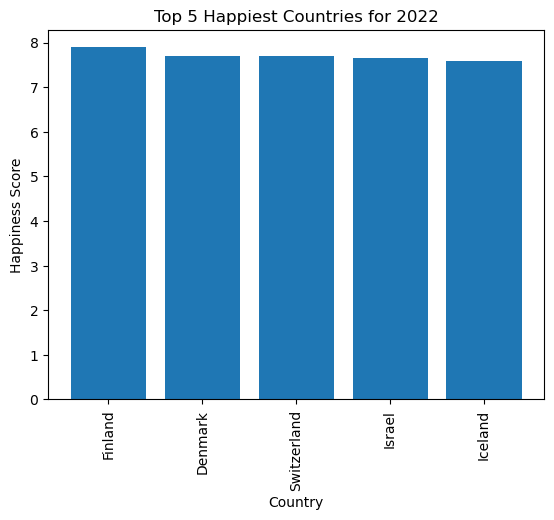

In [9]:
#Bar chart of top 5 happiest countries
# select data for most recent year
figure1 = highest_life_ladder.loc[highest_life_ladder['year'] == 2022]

# sort data by happiness score
figure1 = highest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure1 = highest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(highest_life_ladder['Country name'], highest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Happiest Countries for 2022')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

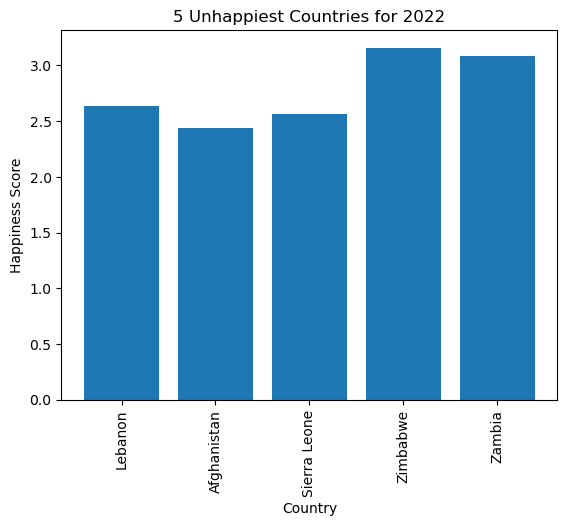

In [10]:
#Bar chart of top 5 Unhappiest countries
# select data for most recent year
figure2 = lowest_life_ladder.loc[lowest_life_ladder['year'] == 2022]

# sort data by happiness score
figure2 = lowest_life_ladder.sort_values(by=['Life Ladder'], ascending=False)

# select top 5 happiest countries
figure2 = lowest_life_ladder.head(5)

# create a bar chart of the top 10 happiest countries
plt.bar(lowest_life_ladder['Country name'], lowest_life_ladder['Life Ladder'])

# add axis labels and a title
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('5 Unhappiest Countries for 2022')

# rotate x-axis labels for readability
plt.xticks(rotation=90)

# display the plot
plt.show()

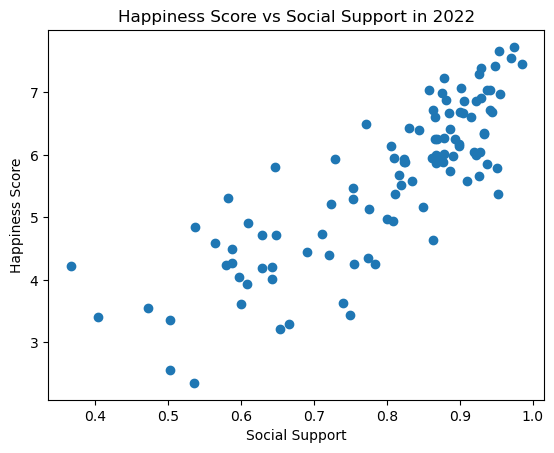

In [11]:
#Create a scatter plot showing happiness score vs social support in 2022
# select data for year 2022
year_2022 = clean_file_df[clean_file_df['year'] == 2022]

# create a scatter plot of happiness score vs social support
plt.scatter(year_2022['Social support'], year_2022['Life Ladder'])

# add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs Social Support in 2022')

# display the plot
plt.show()


Text(0.45, 6.5, 'R squared = 0.64')

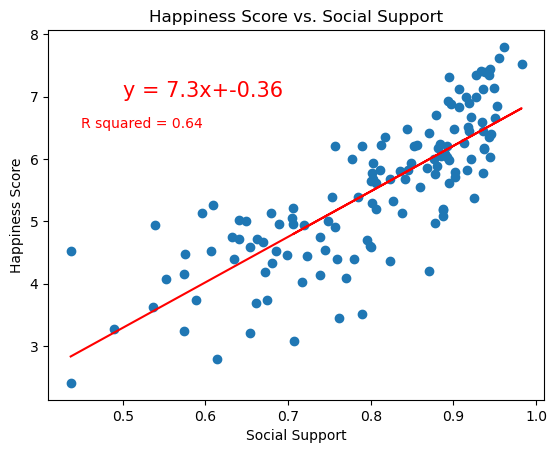

In [12]:
# Scatter plot of happiness score vs. Social Support with liner regression
figure5 = sorted_df.groupby('Country name').mean(numeric_only=True)

# Create a scatter plot of happiness score vs. Social Support
plt.scatter(figure5['Social support'], figure5['Life Ladder'])

# Add axis labels and a title
plt.xlabel('Social Support')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Social Support')

# Perform linear regression
(social_slope, social_intercept, social_rvalue, social_pvalue, social_std_err) = st.linregress(figure5['Social support'], figure5['Life Ladder'])
regress_values = figure5['Social support'] * social_slope + social_intercept
line_eq = "y = " + str(round(social_slope,2)) + "x+" + str(round(social_intercept,2))

# Find r^2
social_r_sq = social_rvalue**2
soc_r_annotate = "R squared = " + str(round(social_r_sq,2))

# Plot regression line
plt.plot(figure5['Social support'], regress_values, "r-")
plt.annotate(line_eq, (0.5, 7), fontsize=15, color="red")
plt.annotate(soc_r_annotate, (0.45, 6.5), fontsize=10, color="red")

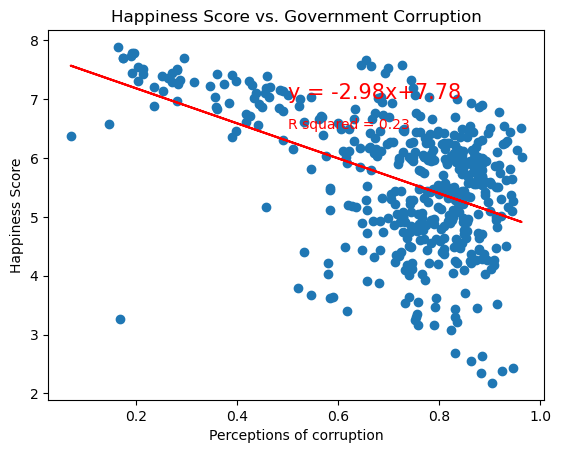

In [13]:
# Create a scatter plot of government corruption vs. Life Ladder
plt.scatter(sorted_df['Perceptions of corruption'], sorted_df['Life Ladder'])

# Add axis labels and a title
plt.xlabel('Perceptions of corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Government Corruption')

# Perform linear regression
(corr_slope, corr_intercept, corr_rvalue, corr_pvalue, corr_std_err) = st.linregress(sorted_df['Perceptions of corruption'], sorted_df['Life Ladder'])
regress_values = sorted_df['Perceptions of corruption'] * corr_slope + corr_intercept
line_eq = "y = " + str(round(corr_slope,2)) + "x+" + str(round(corr_intercept,2))

# Find r^2
corr_r_sq = corr_rvalue**2
corr_r_annotate = "R squared = " + str(round(corr_r_sq,2))

# Plot regression line
plt.plot(sorted_df['Perceptions of corruption'], regress_values, "r-")
plt.annotate(line_eq, (0.5, 7), fontsize=15, color="red")
plt.annotate(corr_r_annotate, (0.5, 6.5), fontsize=10, color="red")

# Show the plot
plt.show()


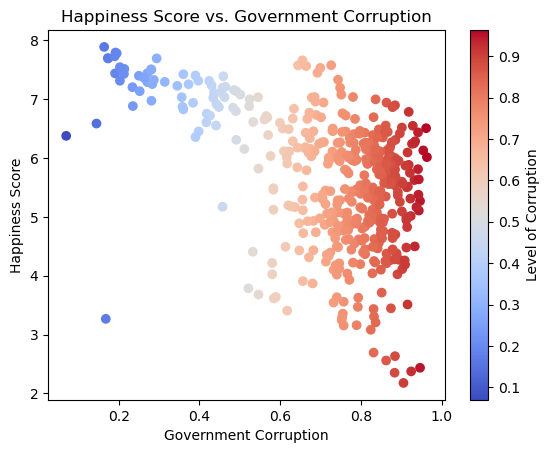

In [14]:
# Create a scatter plot of Life Ladder vs. Government Corruption, with colors representing the level of corruption
plt.scatter(sorted_df['Perceptions of corruption'], sorted_df['Life Ladder'], c=sorted_df['Perceptions of corruption'], cmap='coolwarm')

# Add axis labels and a title
plt.xlabel('Government Corruption')
plt.ylabel('Happiness Score')
plt.title('Happiness Score vs. Government Corruption')

# Add a colorbar to show the level of corruption
cbar = plt.colorbar()
cbar.set_label('Level of Corruption')

# Show the plot
plt.show()

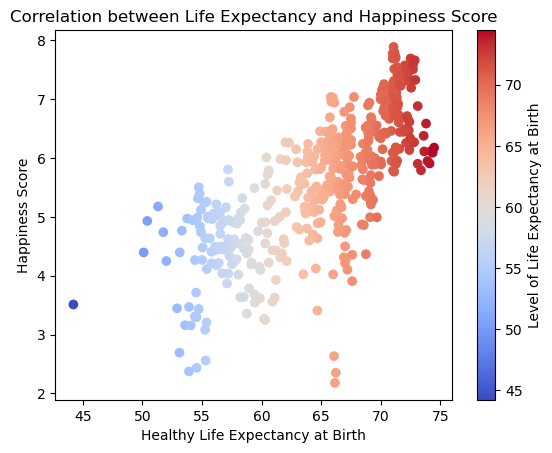

In [15]:
# create a scatter plot of life expectancy vs happiness score
plt.scatter(sorted_df['Healthy life expectancy at birth'], sorted_df['Life Ladder'], c=sorted_df['Healthy life expectancy at birth'], cmap='coolwarm')


# add axis labels and a title
plt.xlabel('Healthy Life Expectancy at Birth')
plt.ylabel('Happiness Score')
plt.title('Correlation between Life Expectancy and Happiness Score')

# Add a colorbar to show the level of Life Expectancy at Birth
cbar = plt.colorbar()
cbar.set_label('Level of Life Expectancy at Birth')

# display the plot
plt.show()


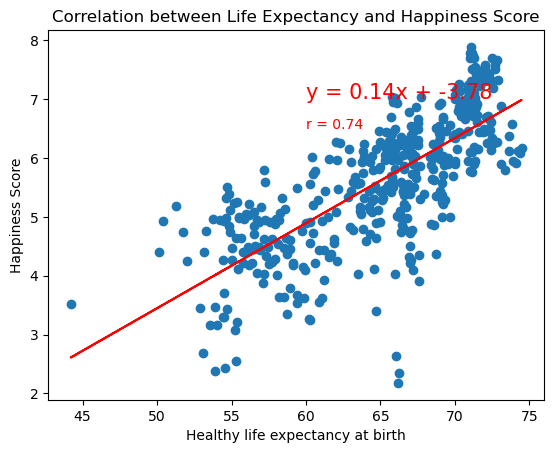

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as st

# create a scatter plot of life expectancy vs happiness score
plt.scatter(sorted_df['Healthy life expectancy at birth'], sorted_df['Life Ladder'])

# add axis labels and a title
plt.xlabel('Healthy life expectancy at birth')
plt.ylabel('Happiness Score')
plt.title('Correlation between Life Expectancy and Happiness Score')

# perform linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sorted_df['Healthy life expectancy at birth'], sorted_df['Life Ladder'])
regress_values = sorted_df['Healthy life expectancy at birth'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# add regression line to plot
plt.plot(sorted_df['Healthy life expectancy at birth'], regress_values, "r-")
plt.annotate(line_eq, (60, 7), fontsize=15, color="red")

# add r-value to plot
r_value = "r = " + str(round(rvalue, 2))
plt.annotate(r_value, (60, 6.5), fontsize=10, color="red")

# display the plot
plt.show()

In [17]:
#Create a dataframe for the highest five countries in 2022 from above analysis.  This new dataframe must include those same countries 
#for comparison over a 4 year timeframe.

# Create the list of countries
countries = ['Finland', 'Denmark', 'Switzerland', 'Israel', 'Iceland']

# Create a new dataframe that includes data for the specified countries
selected_countries_df = new_df[new_df['Country name'].isin(countries)].copy()

print(selected_countries_df.head(20))

     Country name  year  Life Ladder  Social support  \
518       Denmark  2019        7.693           0.958   
519       Denmark  2020        7.515           0.947   
520       Denmark  2021        7.699           0.945   
521       Denmark  2022        7.545           0.970   
634       Finland  2019        7.780           0.937   
635       Finland  2020        7.889           0.962   
636       Finland  2021        7.794           0.970   
637       Finland  2022        7.729           0.974   
827       Iceland  2019        7.533           0.982   
828       Iceland  2020        7.575           0.983   
829       Iceland  2021        7.565           0.980   
830       Iceland  2022        7.449           0.985   
922        Israel  2019        7.332           0.946   
923        Israel  2020        7.195           0.959   
924        Israel  2021        7.578           0.917   
925        Israel  2022        7.662           0.954   
1874  Switzerland  2019        7.694           0

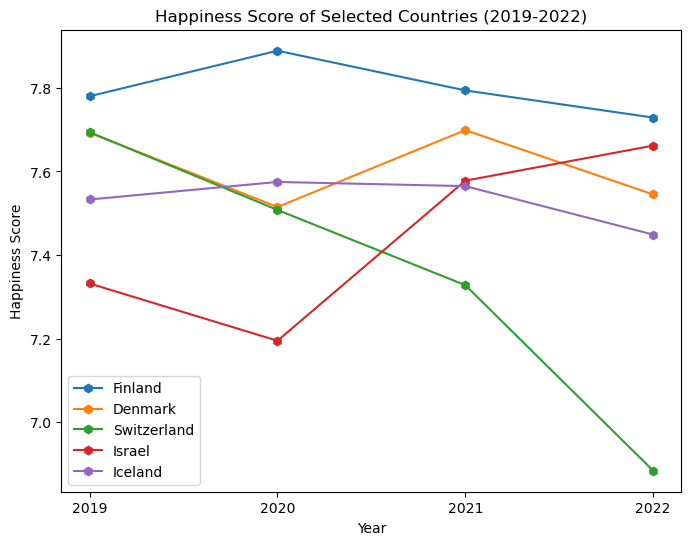

In [18]:
#Create a Line plot using the Happiness Score for the 5 highest countries with Mat.
plt.figure(figsize=(8, 6))
for country in countries:
    top_country_data = selected_countries_df[selected_countries_df['Country name'] == country]
    plt.plot(top_country_data['year'].astype(str), top_country_data['Life Ladder'], label=country,  marker='h')
plt.xlabel('Year')
plt.ylabel('Happiness Score')
plt.title('Happiness Score of Selected Countries (2019-2022)')
plt.legend()
plt.show()

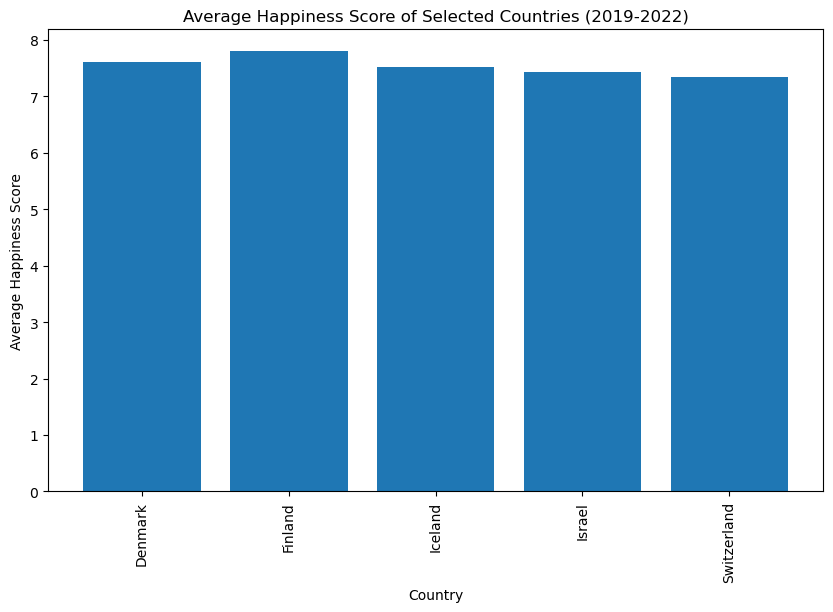

In [19]:
#Create a bar plot to take the average happiness score for the 5 countries for the 4 year timeframe.
plt.figure(figsize=(10, 6))
new_country_df = selected_countries_df.groupby('Country name')['Life Ladder'].mean()
plt.bar(new_country_df.index, new_country_df.values)
plt.xlabel('Country')
plt.ylabel('Average Happiness Score')
plt.title('Average Happiness Score of Selected Countries (2019-2022)')
plt.xticks(rotation=90)
plt.show()

In [20]:
#Create the dataframes filterd for the years 2019 and 2022 - pre pandemic vs. after
yr_2019_df = selected_countries_df[selected_countries_df['year'] == 2019]
yr_2022_df = selected_countries_df[selected_countries_df['year'] == 2022]

# Merge the dataframes by 'Country name' to show happiness comparison scores
merged_yr_df = yr_2019_df.merge(yr_2022_df, on='Country name', suffixes=('_2019', '_2022'))

# Calculate the change in happiness score from 2019 to 2022
merged_yr_df['Happiness Score Change'] = merged_yr_df['Life Ladder_2022'] - merged_yr_df['Life Ladder_2019']

# Display the change in happiness score
print(merged_yr_df[['Country name', 'Happiness Score Change']])

  Country name  Happiness Score Change
0      Denmark                  -0.148
1      Finland                  -0.051
2      Iceland                  -0.084
3       Israel                   0.330
4  Switzerland                  -0.810


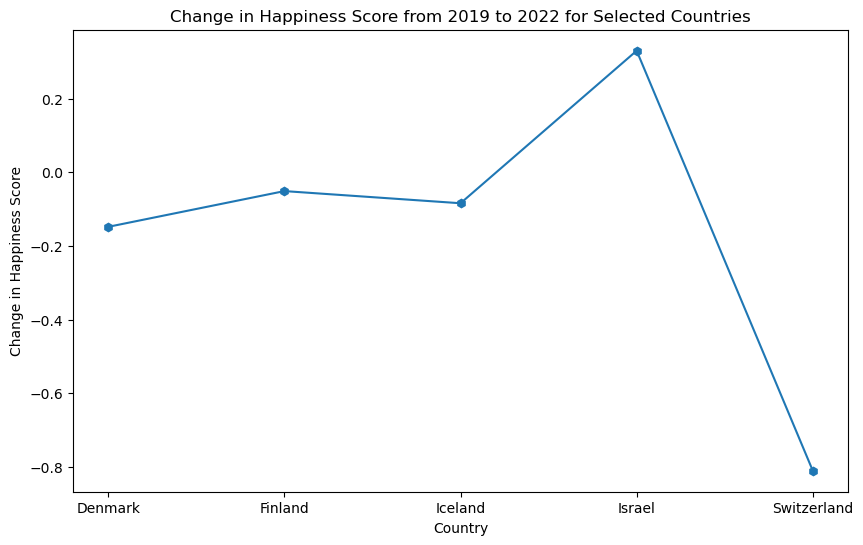

In [21]:
# Calculate the change in happiness score from 2019 to 2022 - pre pandemic vs. after
merged_yr_df['Happiness Score Change'] = merged_yr_df['Life Ladder_2022'] - merged_yr_df['Life Ladder_2019']

# Sort the merged yr dataframe by the Country names
merged_yr_df_sorted = merged_yr_df.sort_values('Country name')

# Add line plot for change in happiness score
plt.figure(figsize=(10, 6))
plt.plot(merged_yr_df_sorted['Country name'], merged_yr_df_sorted['Happiness Score Change'], marker='h')
plt.xlabel('Country')
plt.ylabel('Change in Happiness Score')
plt.title('Change in Happiness Score from 2019 to 2022 for Selected Countries')
plt.xticks
plt.show()